##### Machine Learning Part 1

#### 1. This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis


In [29]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
# Define path

path=r'C:\Users\manis\Documents\World_covid_data_Analysis'

In [5]:
#Import the cleaned dataset for the project World Covid Data Analysis
## Import data
df = pd.read_csv(os.path.join(path, '02 Data','prepared_data', 'maincoviddataset_cleanedTask6.2.csv'),index_col=False)

In [6]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,continent,location,date,cumulative_cases,new_cases,cumulative_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,mortality range
0,0,0,Asia,Afghanistan,2/24/2020,5,5,0,0,0,0,0,39835428,Low mortality
1,1,1,Asia,Afghanistan,2/25/2020,5,0,0,0,0,0,0,39835428,Low mortality
2,2,2,Asia,Afghanistan,2/26/2020,5,0,0,0,0,0,0,39835428,Low mortality
3,3,3,Asia,Afghanistan,2/27/2020,5,0,0,0,0,0,0,39835428,Low mortality
4,4,4,Asia,Afghanistan,2/28/2020,5,0,0,0,0,0,0,39835428,Low mortality
5,5,5,Asia,Afghanistan,2/29/2020,5,0,0,0,0,0,0,39835428,Low mortality
6,6,6,Asia,Afghanistan,3/1/2020,5,0,0,0,0,0,0,39835428,Low mortality
7,7,7,Asia,Afghanistan,3/2/2020,5,0,0,0,0,0,0,39835428,Low mortality
8,8,8,Asia,Afghanistan,3/3/2020,5,0,0,0,0,0,0,39835428,Low mortality
9,9,9,Asia,Afghanistan,3/4/2020,5,0,0,0,0,0,0,39835428,Low mortality


In [7]:
df.shape

(129585, 14)

In [8]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'continent', 'location', 'date',
       'cumulative_cases', 'new_cases', 'cumulative_deaths', 'new_deaths',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'population', 'mortality range'],
      dtype='object')

In [12]:
#Data Wrangling
#Drop Unecessary columns
df_new=df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [13]:
df_new.columns

Index(['continent', 'location', 'date', 'cumulative_cases', 'new_cases',
       'cumulative_deaths', 'new_deaths', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'population',
       'mortality range'],
      dtype='object')

#### 2. Data Cleaning

In [14]:
# # Check for missing values

df_new.isnull().sum() # No missing Values

continent                  0
location                   0
date                       0
cumulative_cases           0
new_cases                  0
cumulative_deaths          0
new_deaths                 0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
population                 0
mortality range            0
dtype: int64

In [15]:
# Check for duplicated records
dups = df.duplicated()

In [16]:
dups.shape # No duplicates

(129585,)

##### 3. Data prep for regression analysis

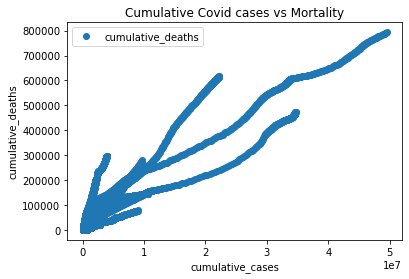

In [20]:
# Created a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Cumulative Covid Cases Vs Mortality

import matplotlib.pyplot as plt

df_new.plot(x = 'cumulative_cases', y='cumulative_deaths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cumulative Covid cases vs Mortality')  
plt.xlabel('cumulative_cases')  
plt.ylabel('cumulative_deaths')  
plt.show()




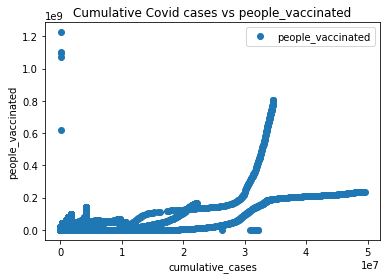

In [21]:
#Created a scatterplot for the "cumulative_cases" and "people_vaccinated" columns
import matplotlib.pyplot as plt

df_new.plot(x = 'cumulative_cases', y='people_vaccinated',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cumulative Covid cases vs people_vaccinated')  
plt.xlabel('cumulative_cases')  
plt.ylabel('people_vaccinated')  
plt.show()


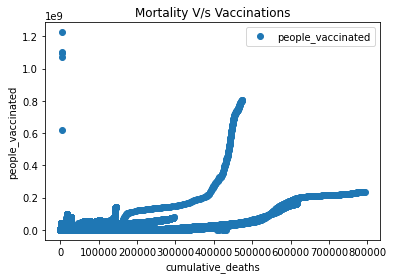

In [22]:
#Created a scatterplot for the "cumulative_deaths" and "people_vaccinated" columns
import matplotlib.pyplot as plt

df_new.plot(x = 'cumulative_deaths', y='people_vaccinated',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Mortality V/s Vaccinations')  
plt.xlabel('cumulative_deaths')  
plt.ylabel('people_vaccinated')  
plt.show()

#### Hypothesis 

 Countries with High Vaccination Rates have Low Mortality "

In [23]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = df['cumulative_deaths'].values.reshape(-1,1)
y = df['people_vaccinated'].values.reshape(-1,1)

In [25]:
X

array([[   0],
       [   0],
       [   0],
       ...,
       [4710],
       [4713],
       [4720]], dtype=int64)

In [26]:
y

array([[      0],
       [      0],
       [      0],
       ...,
       [3883107],
       [3897441],
       [3908712]], dtype=int64)

In [33]:
# Spliting data into a training set and a test set.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression Analysis


In [34]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

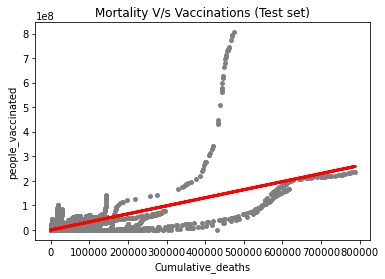

In [37]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Mortality V/s Vaccinations (Test set)')
plot_test.xlabel('Cumulative_deaths')
plot_test.ylabel('people_vaccinated')
plot_test.show()

 #### interpretation of how well the line appears to fit the data
 
Here the Linear model represented by the red regression line does'nt perfectly covers all the data points. In fact majority of the data points are far away from the regression line.Hence we can say that the regression line appears like not a good fit for the data

In [38]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [39]:
# Printing the model summary statistics to  evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[328.69770628]]
Mean squared error:  266111623413157.38
R2 score:  0.43710634495961254


In [40]:
y_predicted

array([[3747723.11186132],
       [-554929.86333198],
       [-674247.13071129],
       ...,
       [-703501.22657013],
       [-728482.25224734],
       [-669645.36282338]])

In [41]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,3.747723e+06
1,0,-5.549299e+05
2,0,-6.742471e+05
3,0,-7.284823e+05
4,0,-3.182675e+05
5,2474767,-7.238805e+05
6,0,-7.284823e+05
7,0,-7.281536e+05
8,2673038,2.025676e+06
9,1201258,-6.180398e+05


In [42]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[328.69770628]]
Mean squared error:  433895395393866.25
R2 score:  0.3887628463360535


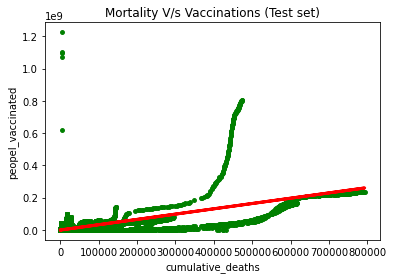

In [45]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Mortality V/s Vaccinations (Test set)')
plot_test.xlabel('cumulative_deaths')
plot_test.ylabel('peopel_vaccinated')
plot_test.show()

##### Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.

After analysising the visualization of the regression line and summary statistics for the test data set, it appears that the model did'nt performed well on the test set.First of  all, the slope is a positive slope here which contradicts my hypothesis which states that "countries with high vacccination rates have low mortality". Secondly root mean squared error (MSE) is too high here which means that the regression line is too far from the majority datapoints and this kind of regression line is'nt an accurate representation of data.Last, R2 score of 0.43 which explains the variance in the data, is not very promising too, and states that the model is'nt a great fit.

Data Collection bias from various countries could be the one reason impacting the performance of this model, because vaccination started at different times in different countries, like developed countries started their vaccination drive months before than developing countries.Also the countries with fatality have most vaccinations as well, so overall to prove that countries with high vaccination have low mortality is going to need more data over the longer period.